In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
!pip install datasets # Install the datasets library
from datasets import load_dataset
dataset = load_dataset('ArthurX007/WineQuality')
data_array = dataset['train']['pH']

In [ ]:
# Step 2: Split features (X) and labels (y)
# Convert the 'train' split to a Pandas DataFrame
df = dataset['train'].to_pandas()

# Now you can use iloc on the DataFrame
X = df.iloc[:, :-1].values  # All columns except the last one
y = df.iloc[:, -1].values

In [ ]:
# Step 3: Encode labels if they are categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 6: Train the KNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)  # p=2 for Euclidean distance
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Step 7: Predict on the test set
y_pred = knn.predict(X_test)

In [ ]:
# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.546875
Confusion Matrix:
 [[ 0  0  0  1  0  0]
 [ 0  0  4  6  0  0]
 [ 0  2 88 40  0  0]
 [ 1  0 49 72 10  0]
 [ 0  0  7 20 15  0]
 [ 0  0  1  1  3  0]]


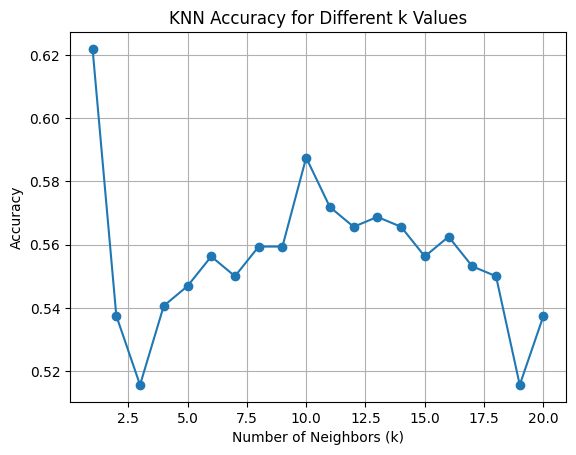

In [ ]:
# Step 9: Optimize k by testing multiple values
accuracies = []
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

# Plot accuracy vs. k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.grid()
plt.show()